# Plot Linear Regression

In this example notebook, we will use calculate a linear regression and then plot it along with correlated errorbars, uncertainty bands, and confidence intervals using `matplotlib`. Some functions of the `mahon` package allow to to easily perform such calculations.

It is important that you have `mahon` as well as `matplotlib` installed. To do so, you can run:

```
pip install mahon matplotlib
```

In [1]:
from mahon import LinReg  # to calculate linear regression
from mahon.unc_calc import error_bar_positions  # to plot correlated error bars
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Data preparation

First, let us prepare some data. This data set is identical to data set 1 in Stephan and Trappitsch (2022).

In [2]:
xdat = np.array([0.0370, 0.0350, 0.0320, 0.0400, 0.0130, 0.0380, 0.0420, 0.0300])  # x data
xunc = xdat * 0.03  # x uncertainty
ydat = np.array([0.00080, 0.00084, 0.00100, 0.00085, 0.00270, 0.00071, 0.00043, 0.00160])  # y data
yunc = ydat * 0.1  # y uncertainty

# correlation factors for uncertainty
rho = np.zeros_like(xdat) + 0.707106781186548

## Calculate Linear Regression

We will now first calculate the linear regression with correlated uncertainties using the `LinReg` class in `mahon` that we imported before.

In [3]:
reg = LinReg(xdat, xunc, ydat, yunc, rho=rho)

## Plot our data

As a first step, let us simply plot the data points. To plot correlated error bars, we can use the `error_bar_positions` function that we imported above from the `mahon` package to calculate the error bar positions. This is necessary since `matplotlib` does not provide a routine to draw correlated error bars directly. However, you will see that it is very simple to achieve!

### Plot the data

Text(0.5, 1.0, 'My correlated uncertainty plot')

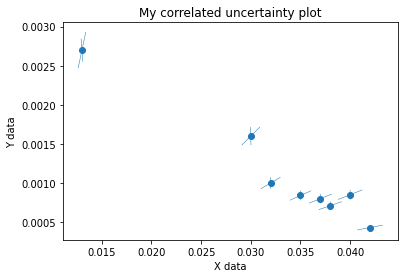

In [4]:
fig, ax = plt.subplots(1, 1)

# plot the datapoints with symbold
ax.plot(xdat, ydat, 'o', color="tab:blue", zorder=30)

# calculate the error bar positions
x_positions, ypositions = error_bar_positions(xdat, xunc, ydat, yunc, rho)
for xpos, ypos in zip(x_positions, ypositions):
    ax.plot(xpos, ypos, '-', color="tab:blue", linewidth=0.5, zorder=29)

# some labels for the axes for good measures
ax.set_xlabel("X data")
ax.set_ylabel("Y data")
ax.set_title("My correlated uncertainty plot")

### Plot the linear regression
To plot the linear regression in addition to the data, we can use a provided method in the `LinReg` package in order to get to points that are bound by the data and can be plotted as a line.

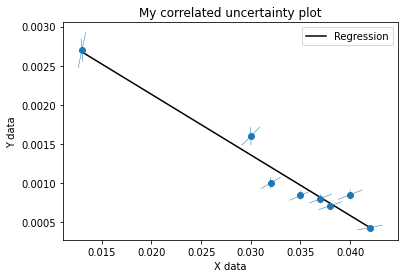

In [5]:
x_reg, y_reg = reg.regression_line()

ax.plot(x_reg, y_reg, '-', color="k", zorder=20, label="Regression")
ax.legend()
fig

### Uncertainty band and / or confidence intervals

Finally, we want to add a 95% confidence interval and a 1$\sigma$ error band. The following routines will allow us to perform this task:

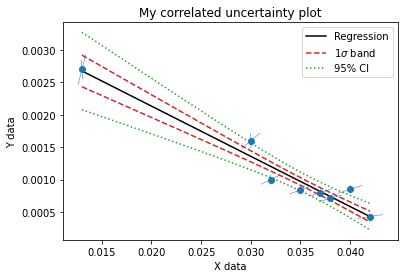

In [6]:
# get arrays to plot for uncertainty band
xdat_1sig, ydat_1sig_min, ydat_1sig_max = reg.uncertainty_band(sigma=1)

# plot the uncertainty band
ax.plot(xdat_1sig, ydat_1sig_min, '--', color="tab:red", label="1$\sigma$ band")
ax.plot(xdat_1sig, ydat_1sig_max, '--', color="tab:red")

# get arrays to plot for conf
xdat_95ci, ydat_95ci_min, ydat_95ci_max = reg.confidence_intervals(p_conf=0.95)

# plot the 95% confidence interval
ax.plot(xdat_95ci, ydat_95ci_min, ':', color="tab:green", label="95% CI")
ax.plot(xdat_95ci, ydat_95ci_max, ':', color="tab:green")

ax.legend()
fig